# Evalutation of Classifiers on full dataset (05/17/2017)

The following are details of my experiments using the Random Forest, Logistic Regression and Multilayer Percpetron learning methods.

In [1]:
import time
import matplotlib
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.manifold import Isomap
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from utils import *
from keras import losses
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

matplotlib.style.use('ggplot')



plt.clf()
norm = mpl.colors.Normalize(vmin=0, vmax=1)
cmap = cm.Spectral
m = cm.ScalarMappable(norm=norm, cmap=cmap)

Using TensorFlow backend.


In [2]:
random_state = 0
t0 = time.clock()
X_p, y_p = load_data_h5("data/ml_pro_features_labels.h5", mode=1)
X_n, y_n = load_data_h5("data/ml_pro_features_labels.h5", mode=0)

print("Data loaded in ", (time.clock() - t0), " seconds.")

X = combine_positive_negative_data(X_n, X_p)
y = combine_positive_negative_data(y_n, y_p)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

print ("Train-Test split: ",X_train.shape[0], "(train)","\t",X_test.shape[0], "(test)")
print("Train-Test split completed in ", (time.clock() - t0), " seconds.")

Data loaded in  1.79793  seconds.
Train-Test split:  159801 (train) 	 39951 (test)
Train-Test split completed in  1.9500670000000007  seconds.


/home/derek/miniconda3/envs/protein_binding/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression trained on full features in  48.67107  seconds.


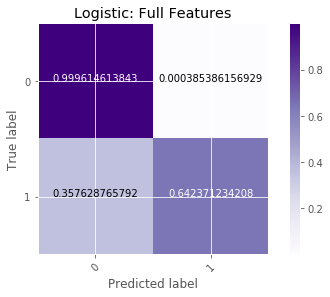

In [3]:
logistic0 = LogisticRegression(random_state=random_state)
t5 = time.clock()
logistic0.fit(X_train, y_train)
print ("Logistic Regression trained on full features in ", (time.clock() - t5), " seconds.")
logistic_preds0 = logistic0.predict(X_test)
generate_report("Logistic: Full Features", logistic0, logistic_preds0, y_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 188)               35532     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 189       
Total params: 35,721
Trainable params: 35,721
Non-trainable params: 0
_________________________________________________________________
None
Train on 119850 samples, validate on 39951 samples
Epoch 1/100
119850/119850 [==============================] - 1s - loss: 0.1962 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.1302 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
119850/119850 [==============================] - 1s - loss: 0.1145 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.1027 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/100
119850/119850 [==============================] - 1s - loss: 0.0989 - preci

119850/119850 [==============================] - 1s - loss: 0.0111 - precision: 0.9961 - recall: 0.9382 - val_loss: 0.0091 - val_precision: 0.9983 - val_recall: 0.9514
MLP trained on full features in  123.74515499999998  seconds


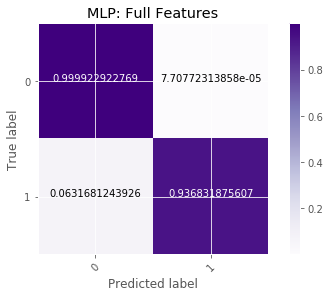

In [4]:
model0 = Sequential()

model0.add(Dense(X_train.shape[1], input_shape=(X_train.shape[1],), activation='sigmoid'))
model0.add(Dense(1, activation='sigmoid'))


model0.compile(optimizer=Adam(lr=1e-4), loss=losses.binary_crossentropy, metrics=[precision, recall])

print(model0.summary())
t7 = time.clock()
model0.fit(X_train, y_train, batch_size=1000, epochs=100, validation_split=0.25, callbacks=[EarlyStopping()])
print ("MLP trained on full features in ", (time.clock() - t7), " seconds")

preds = model0.predict(X_test)

preds[preds >= 0.5] = 1
preds[preds < 0.5] = 0
generate_report("MLP: Full Features", model0, preds, y_test)

The multilayer perceptron outperforms the logistic regression in terms of correctly distinguishing true positives from false positives.

/home/derek/miniconda3/envs/protein_binding/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Random forest trained on full features in  7.212886999999995  seconds.


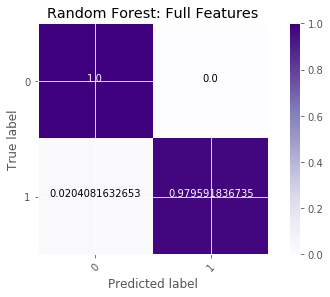

In [5]:
rforest0 = RandomForestClassifier(max_depth=16,random_state=random_state)
t1 = time.clock()
rforest0.fit(X_train, y_train)
print ("Random forest trained on full features in ", (time.clock() - t1), " seconds.")
rforest_preds0 = rforest0.predict(X_test)
generate_report("Random Forest: Full Features", rforest0, rforest_preds0, y_test)

The random forest is perhaps unsurprisingly able to improve upon the results of the multilayer perceptron.


# Dimensionality Reduction

In [6]:
X_p, y_p = load_data_h5("data/ml_pro_features_labels.h5", mode=1)
X_n, y_n = load_data_h5("data/ml_pro_features_labels.h5", mode=0)


X = combine_positive_negative_data(X_n, X_p)
y = combine_positive_negative_data(y_n, y_p)

### Linear Dimensionality Reduction (PCA)

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize

X_norm = normalize(X)

reduced_x_ = PCA(n_components=4).fit_transform(X_norm)
print (reduced_x_.shape)

(199752, 4)


0.20.1
RangeIndex(start=0, stop=1, step=1)


/home/derek/miniconda3/envs/protein_binding/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  if sys.path[0] == '':


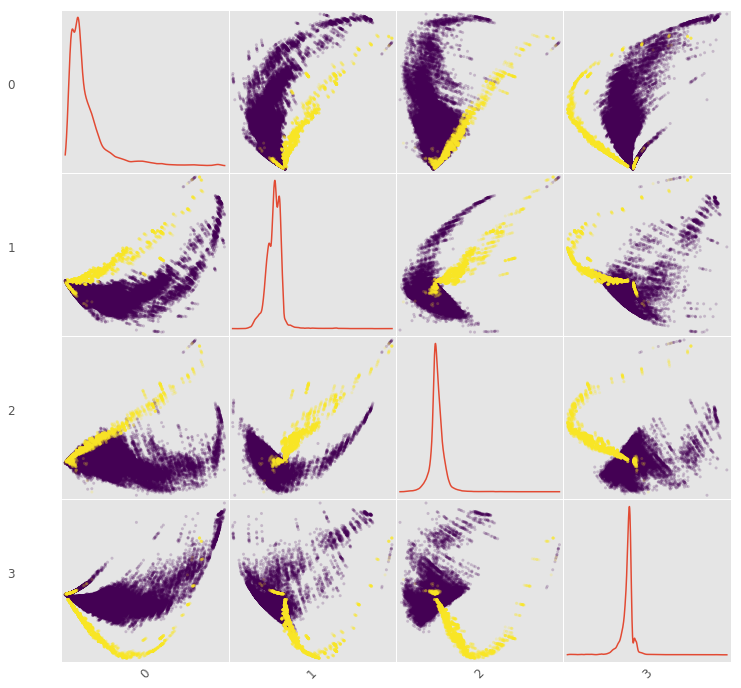

In [8]:
reduced_x_ = pd.DataFrame(reduced_x_)

print (pd.__version__)

#reduced_x_[(reduced_x_.shape[1]+1)]  = pd.DataFrame(y)
#print (reduced_x_.shape)

y_labels = pd.DataFrame(y)
print (y_labels.columns)

plt.clf()
sm = pd.toolsplotting.scatter_matrix(reduced_x_,alpha=0.2, c = y_labels[0],figsize=(12,12),diagonal='kde')

[s.xaxis.label.set_rotation(45) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-0.3,0.5) for s in sm.reshape(-1)]

#Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]

plt.show()


### Non-linear Dimensionality Reduction (TSNE)
Unfortunately the non-linear dimensionality reduction techniques (manifold learning) are unable to process the full dataset due to limitations in their implementations. Instead all positives are pulled from the dataset and the remaining negative entries are stratified for the visualizations.

In [9]:
from sklearn.model_selection import StratifiedKFold
X_p, y_p = load_data_h5("data/ml_pro_features_labels.h5", mode=1)
X_n, y_n = load_data_h5("data/ml_pro_features_labels.h5", mode=0)

num_splits = np.ceil(X_n.shape[0] / X_p.shape[0])

X = combine_positive_negative_data(X_n, X_p)
y = combine_positive_negative_data(y_n, y_p)

In [10]:
from sklearn.manifold import TSNE

Manifold learning allows us to learn a mapping from a high dimensional non-linear space to a lower dimensional space, i.e. we assume that the features of our data lie on a manifold $\mathcal{M} \in R^{n}$. As observed in the previous section, PCA is able to provide some insight into the distribution of classes in a reduced feature space.  

In [11]:
#manifold_x_ = TSNE(n_components=2, perplexity=50, init='pca').fit_transform(X)

#plt.clf()
#plt.figure(figsize=(12,12))
#plt.scatter(x=manifold_x_[:,0],y=manifold_x_[:,1])
#plt.show()

TSNE produces a 2-dimensional representation that is able to distinguish very clear patterns in the data as it can be observed the 